# introduction to machine learning
## PCA analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [41]:
first_name= "Mohammad Amin"
last_name= "Molaei Arpanahi"
student_number= "401112084"

In [42]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [43]:
#load the data set and fill nan value with 0
# TODO (load dataset)
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#reshape data from 28*28 matrix to 784 array

X_train= x_train.reshape(x_train.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)

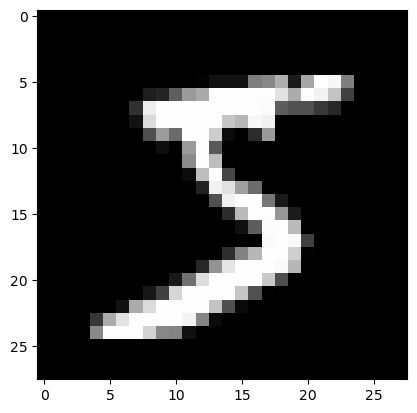

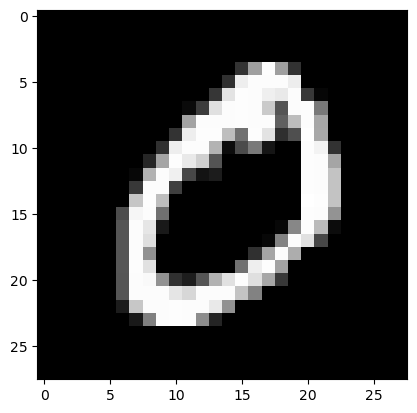

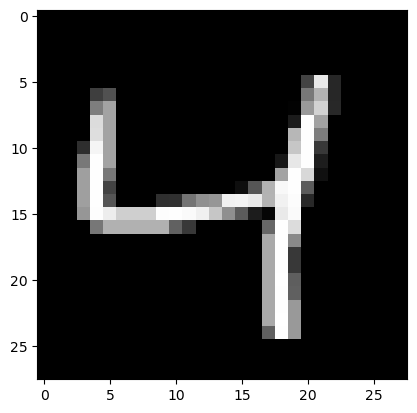

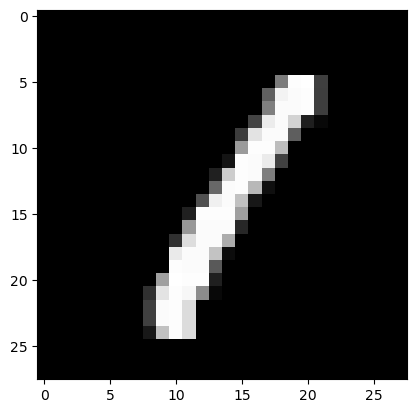

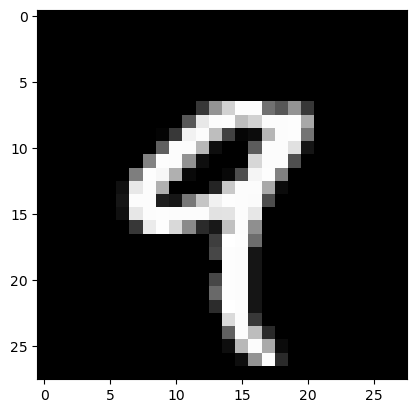

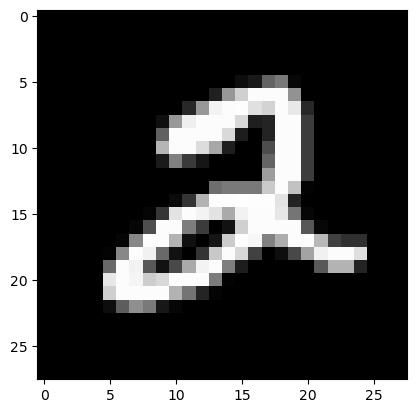

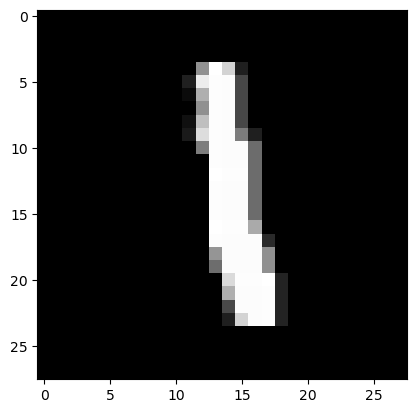

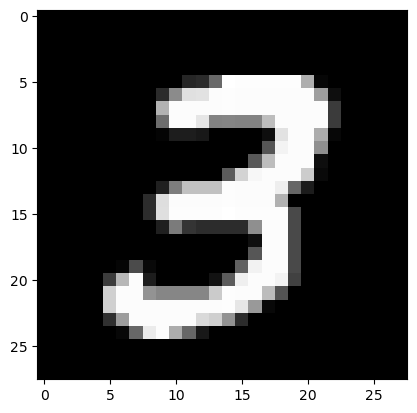

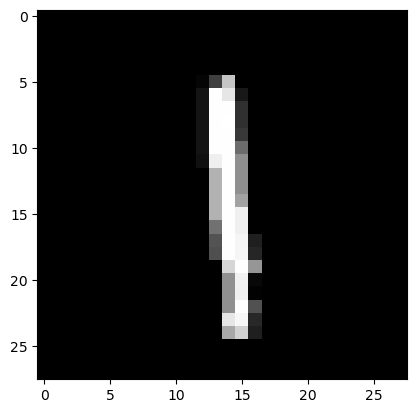

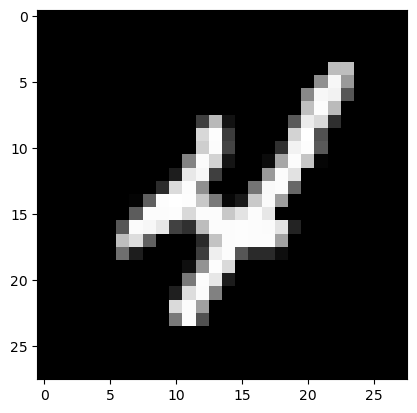

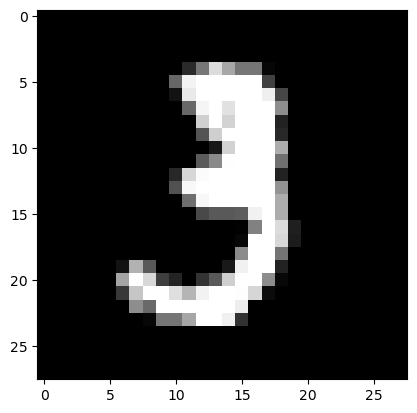

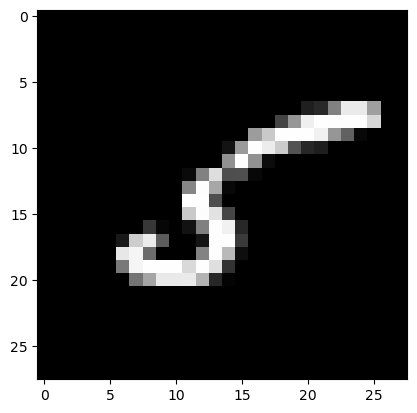

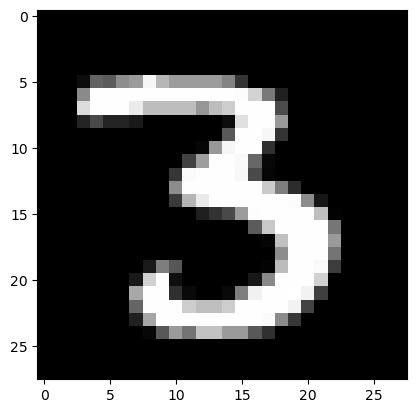

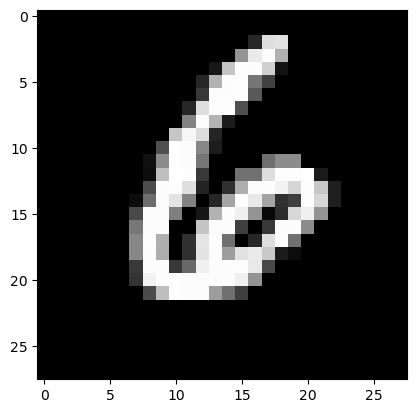

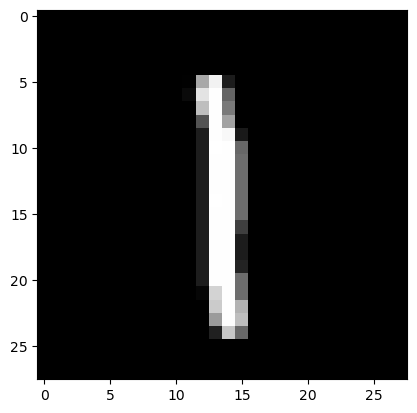

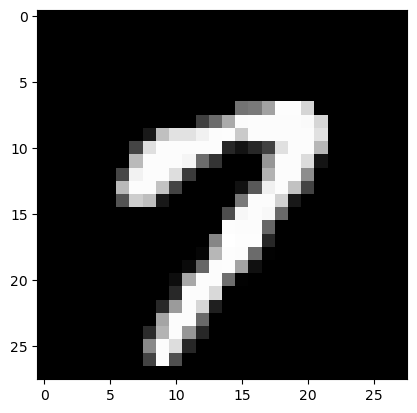

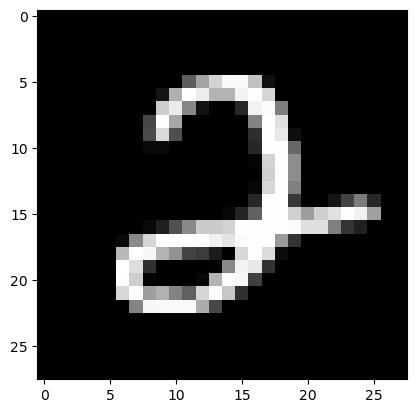

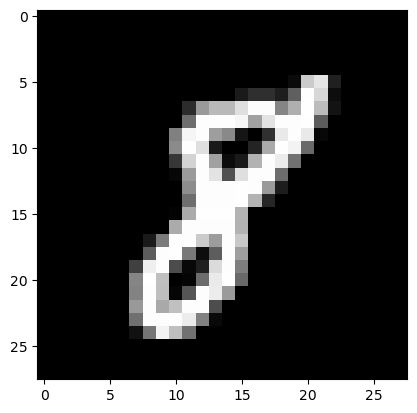

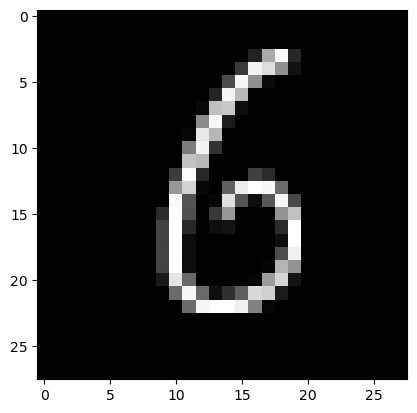

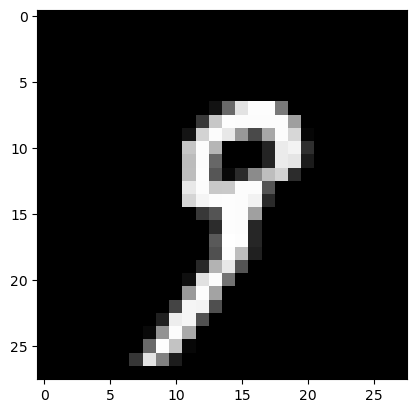

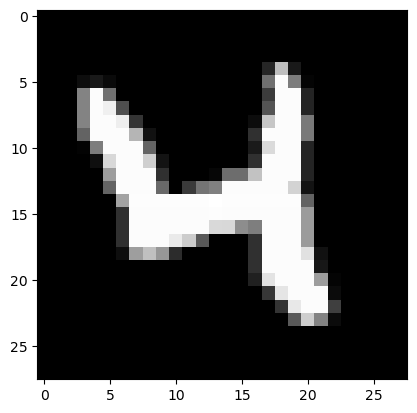

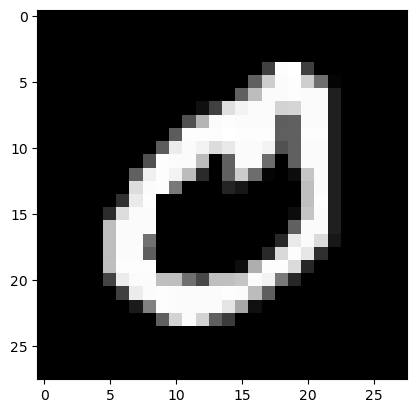

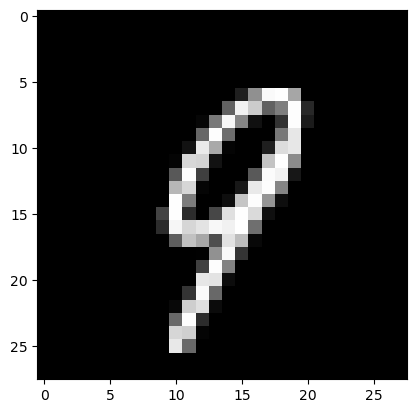

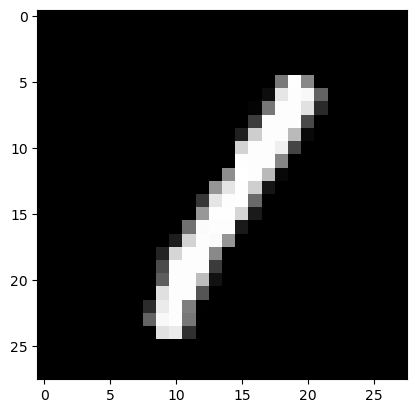

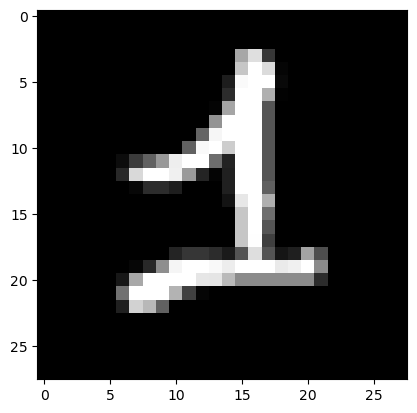

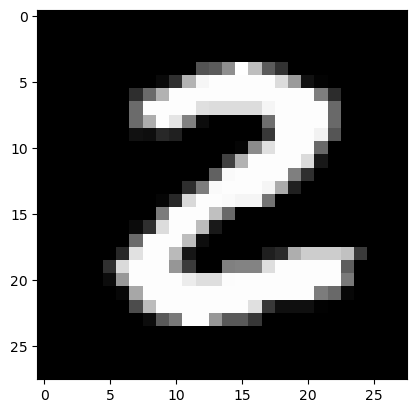

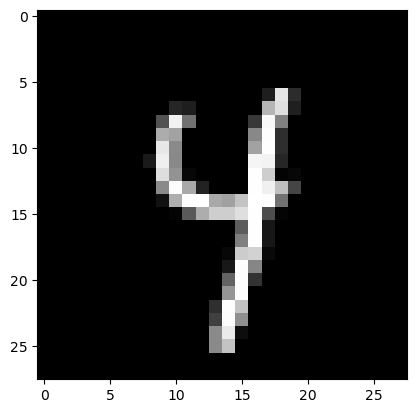

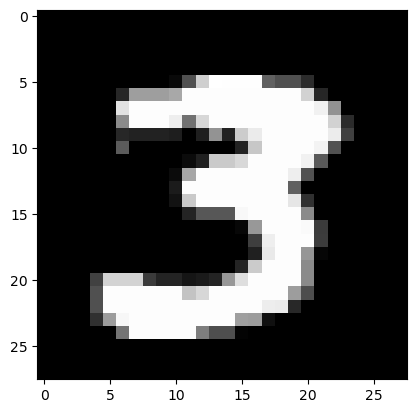

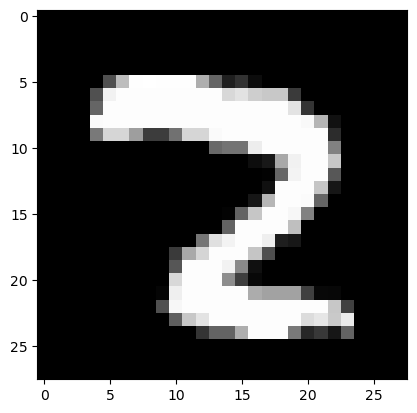

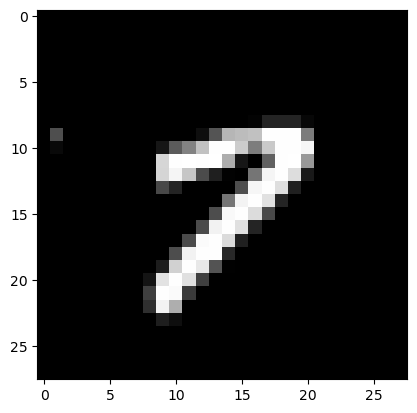

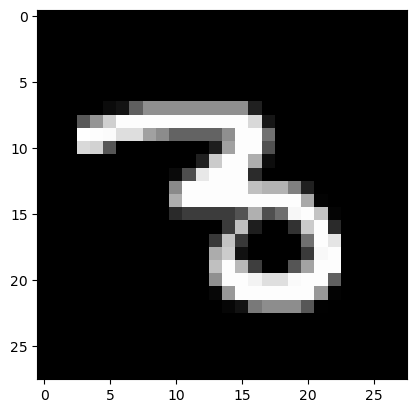

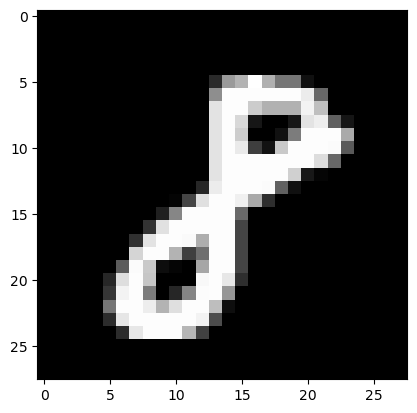

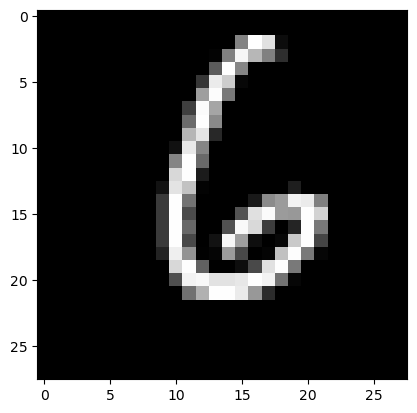

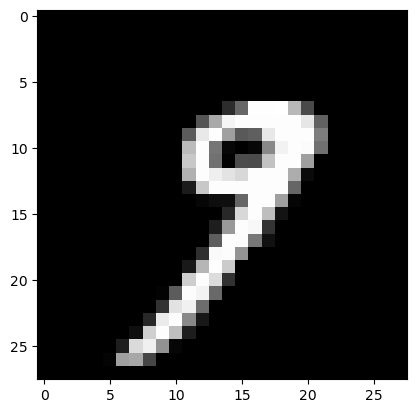

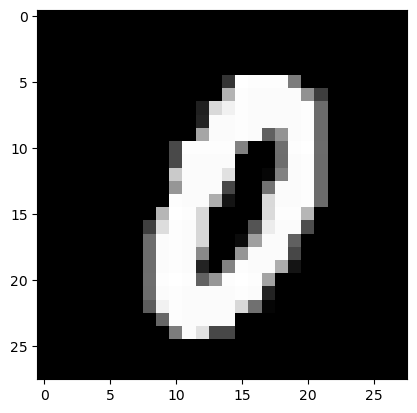

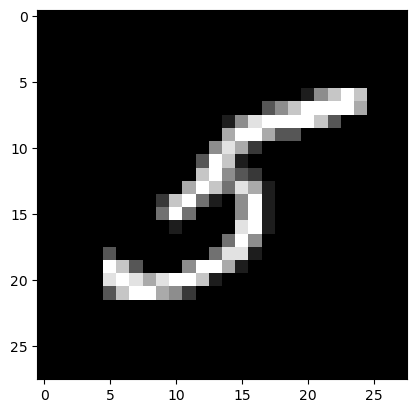

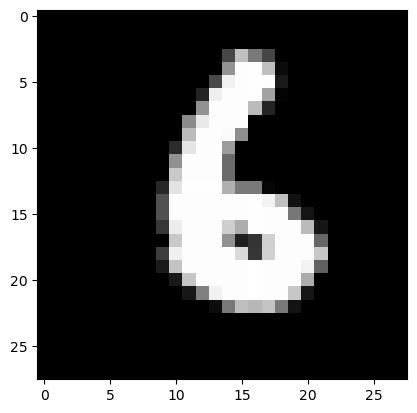

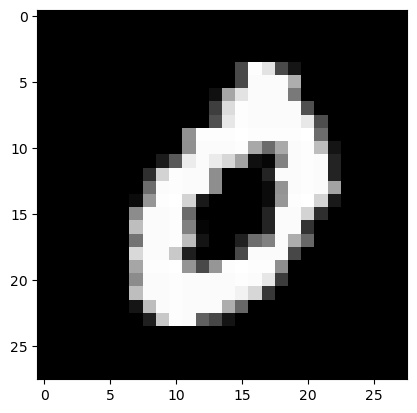

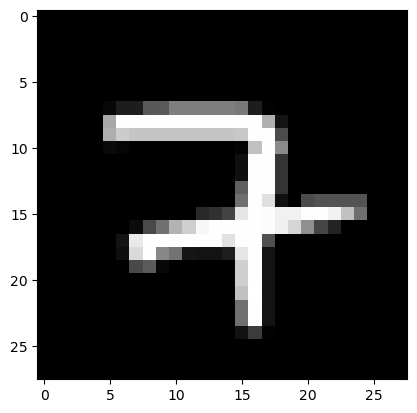

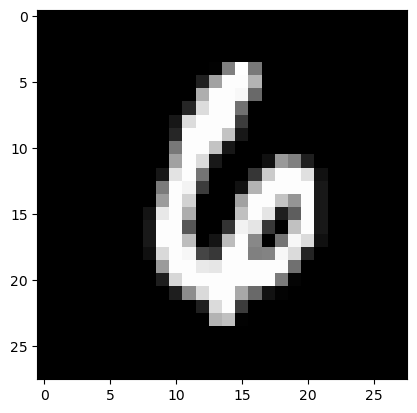

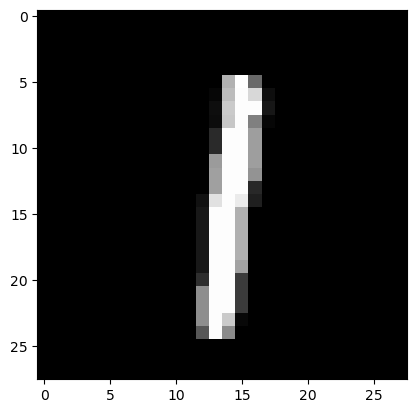

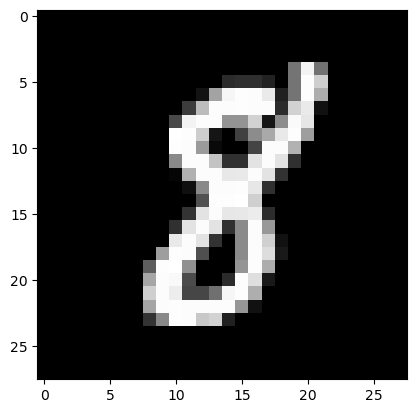

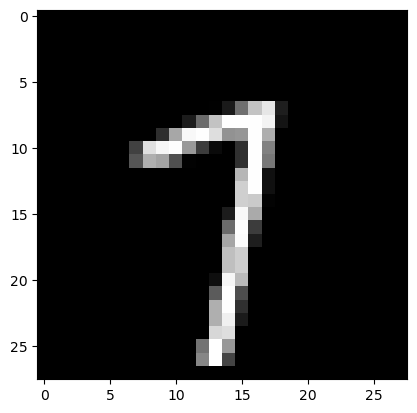

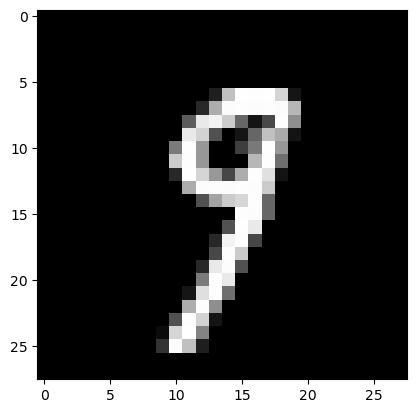

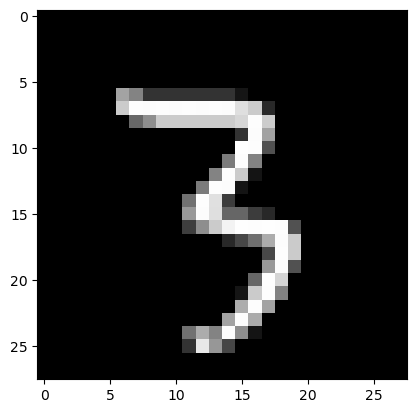

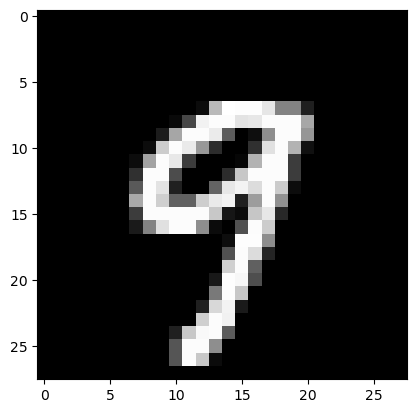

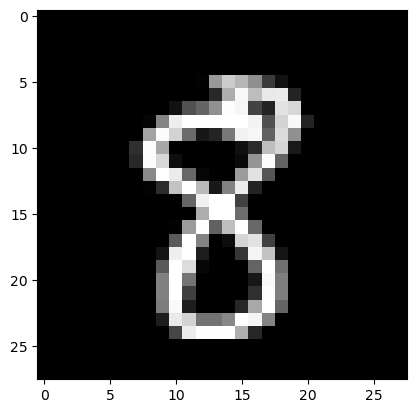

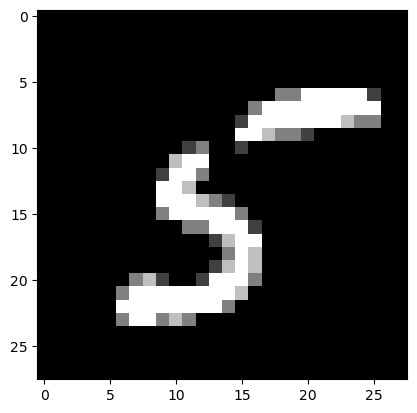

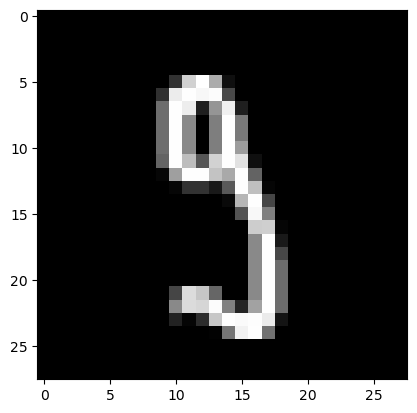

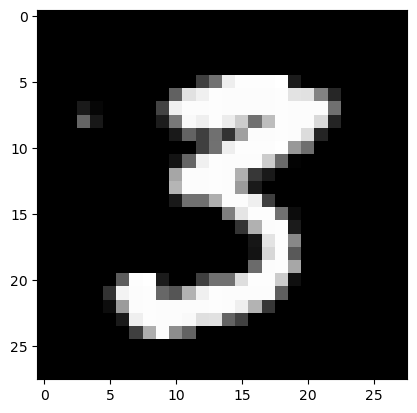

In [142]:
# here show 50 first of this images

def show_images(num_images,X):
    #inputs dataset and number of images wants to show
    
    for k in range(num_images) : 
        plt.imshow(X[k], cmap='gray')
        plt.show()

    
show_images(50,x_train)

In [46]:
#scale the data set to [0 1]

X_train = X_train / ( np.max(X_train) - np.min(X_train))
X_test = X_test / ( np.max(X_test) - np.min(X_test))

# calculate covariance matrix and its eigen values/eigen vectors


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [47]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

cov_X_train = np.cov(X_train, rowvar=False)


# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_X_train)

# Sort the eigenvalues and corresponding eigenvectors in descending order

sorted_indices = np.argsort(eigenvalues)[::-1]
eigen_values = eigenvalues[sorted_indices]
eigen_vectors = eigenvectors[:, sorted_indices]
b = cov_X_train @ eigen_vectors[:,0]
m = eigen_values[0] * eigen_vectors[:,0]
print(np.max(m))
print(np.max(b))


0.39314315783761394
0.39314315783761394


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [48]:
explained_variance = 0.8 # you can change this variable to get more component of datasets.

cum_variance = np.cumsum(eigenvalues) /np.sum(eigenvalues) 
num_components = np.argmax(cum_variance >= explained_variance) + 1
print("The number of components is " ,num_components)

#calculate the compression_ratio

compression_ratio = num_components / cov_X_train.shape[0]
print("The compression ratio is  " , compression_ratio)

The number of components is  44
The compression ratio is   0.05612244897959184


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

Before PCA : 


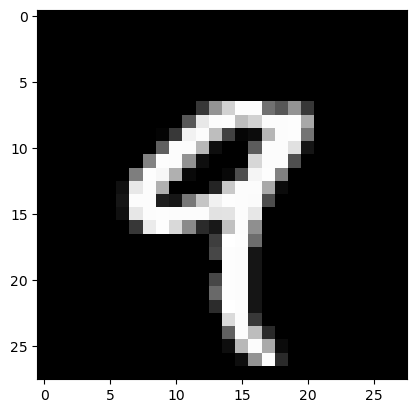

After PCA : 


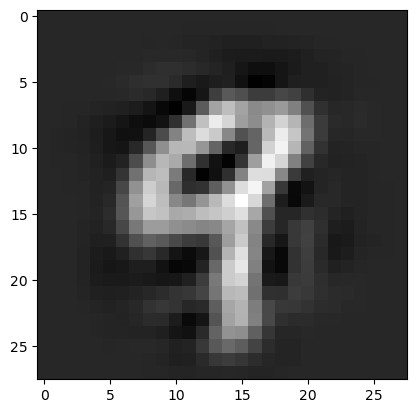

In [50]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
F = X_train @ eigenvectors[:,:num_components]
X_k = F @ np.transpose(eigenvectors[:,:num_components])
#TODO
#plot the dimentionally reduced data
#plot the original data


x_k= X_k.reshape(X_k.shape[0], 28,28)

plt.imshow(x_train[4], cmap='gray')
print("Before PCA : ")
plt.show()

plt.imshow(x_k[4], cmap='gray')
print("After PCA : ")

plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [73]:
#complete below function using python PCA function
cov_X_train = np.cov(X_train, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_train)
X_train= x_train.reshape(x_train.shape[0], 784)
def do_pca(n_components, data):

  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
    data = data / ( np.max(data) - np.min(data))
    first_dimention = data.shape[1]  
    data= data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    cov_data = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_X_train)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    F = data @ eigenvectors[:,:n_components]
#     pca_data = F @ np.transpose(eigenvectors[:,:n_components])
#     pca_data = reduced_data.reshape(data.shape[0], first_dimention, first_dimention)
    return F
do_pca(40, x_test).shape

(10000, 40)

In [129]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.linear_model import LogisticRegression

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
    #     theta = np.linalg.inv(xtrain.T.dot(xtrain)).dot(xtrain.T).dot(ytrain)
    # logistic regression 
    model = LogisticRegression(max_iter = 500)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    acc = accuracy_score(ytest, pred)
    return acc

In [135]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
X =  np.vstack((x_train, x_test))
y = np.concatenate((y_train, y_test))
acc_list, pc_list = [], []
for pc in range(2,102):
    reduced_complexity_data = do_pca(pc, X)
    acc = ML_model(reduced_complexity_data, y)
    print(f"\n N of components : {pc} >>> Accuracy = {acc} ")
    acc_list.append(acc)
    pc_list.append(pc)
    


 N of components : 2 >>> Accuracy = 0.44621428571428573 

 N of components : 3 >>> Accuracy = 0.4670714285714286 

 N of components : 4 >>> Accuracy = 0.5709285714285715 

 N of components : 5 >>> Accuracy = 0.678 

 N of components : 6 >>> Accuracy = 0.7308571428571429 

 N of components : 7 >>> Accuracy = 0.7608571428571429 

 N of components : 8 >>> Accuracy = 0.7913571428571429 

 N of components : 9 >>> Accuracy = 0.7909285714285714 

 N of components : 10 >>> Accuracy = 0.8082142857142857 

 N of components : 11 >>> Accuracy = 0.8127142857142857 

 N of components : 12 >>> Accuracy = 0.8266428571428571 

 N of components : 13 >>> Accuracy = 0.8317142857142857 

 N of components : 14 >>> Accuracy = 0.8306428571428571 

 N of components : 15 >>> Accuracy = 0.8424285714285714 

 N of components : 16 >>> Accuracy = 0.8501428571428571 

 N of components : 17 >>> Accuracy = 0.8627857142857143 

 N of components : 18 >>> Accuracy = 0.8673571428571428 

 N of components : 19 >>> Accurac

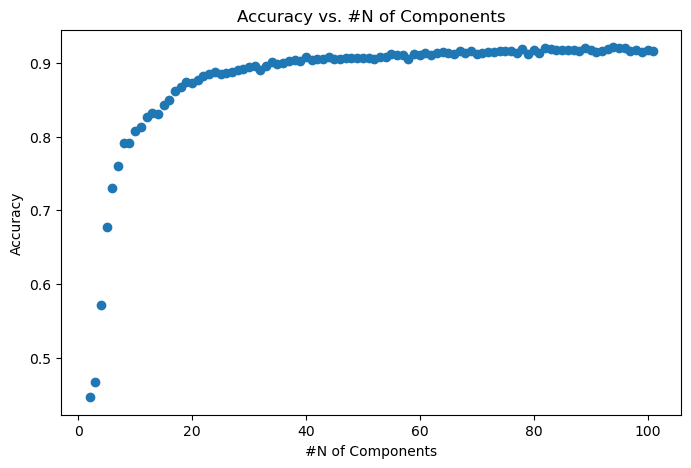

In [138]:
#plot the accuracy based on components.
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(pc_list, acc_list)
plt.xlabel('#N of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. #N of Components')
plt.show()

In [143]:
max_acc = max(acc_list)
print("The maximum accuray for logistic regression is ",max_acc)
print("The number of components that maximize the accuracy is ",pc_list[acc_list.index(max_acc)])

The maximum accuray for logistic regression is  0.9215714285714286
The number of components that maximize the accuracy is  94


### Clearly, achieving a 90 percent accuracy level is feasible with 34 components.